In [2]:
"""
Authors: John Lipor, Phillip Kearns
Spectral Clustering Demo - syntheticTest
python version: Python 3.7.2
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import helperFunctions as hf
from mySpectralClustering import mySpectralClustering

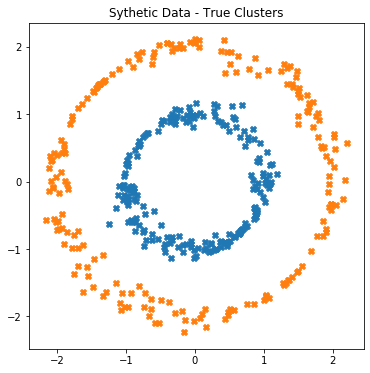

In [8]:
# Generate noisy data on two concentric spheres
D = 2
N = 400
K = 2
trueLabels = np.append(np.ones([N//2, 1]), 2 * np.ones([N//2, 1])).reshape(N,1)

# Noise on data
var = 0.01

# cluster 1
X1 = np.random.randn(D, N//2)
X1 = X1 / np.tile(np.sqrt(sum(X1**2)), (D,1))
X1 = X1 + np.tile(np.sqrt(var) * np.random.randn(1, N//2), (D,1))

# cluster 2
X2 = np.random.randn(D, N//2)
X2 = 2*X2 / np.tile(np.sqrt(sum(X2**2)), (D,1))
X2 = X2 + np.tile(np.sqrt(var) * np.random.randn(1, N//2), (D,1))

X  = np.append(X1, X2, axis=1)

# Data visualization
plt.figure(figsize=(6,6))
plt.scatter(X[0, 0:N//2], X[1, 0:N//2], marker='X')
plt.scatter(X[0, N//2:N], X[1, N//2:N], marker='X')
plt.title("Sythetic Data - True Clusters");

KMeans error:0.4675


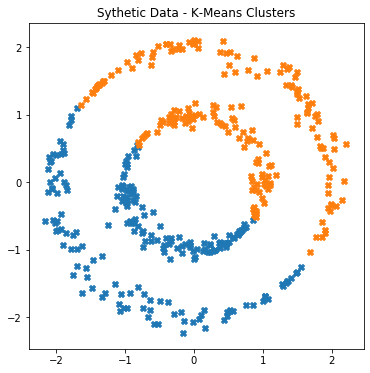

In [9]:
# Kmeans
k_means = KMeans(n_clusters=K, max_iter=100).fit(X.T)
estLabels = k_means.labels_.reshape(N,1)
kmeanserr, estLabels = hf.missRate(trueLabels, estLabels)
print(f"KMeans error:{kmeanserr}")

plt.figure(figsize=(6,6))
plt.scatter(X[0, np.argwhere(estLabels==1)], X[1, np.argwhere(estLabels==1)], marker='X')
plt.scatter(X[0, np.argwhere(estLabels==2)], X[1, np.argwhere(estLabels==2)], marker='X')
plt.title("Sythetic Data - K-Means Clusters");

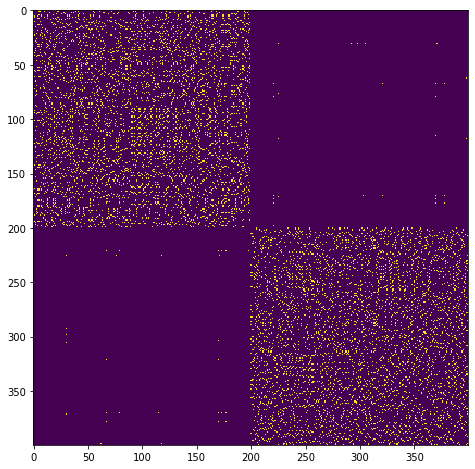

In [10]:
# Spectral Clustering
# Build adjacency matrix
nNeighbors = 20
wtype = 'constant'
sigma = 1
W = hf.myKNN(X, nNeighbors, wtype, sigma)

# Look at the resulting graph:
plt.figure(figsize=(8,8))
plt.imshow(W);

Spectral Clustering error (normalized = 0): 0.50
Spectral Clustering error (normalized = 1): 0.28


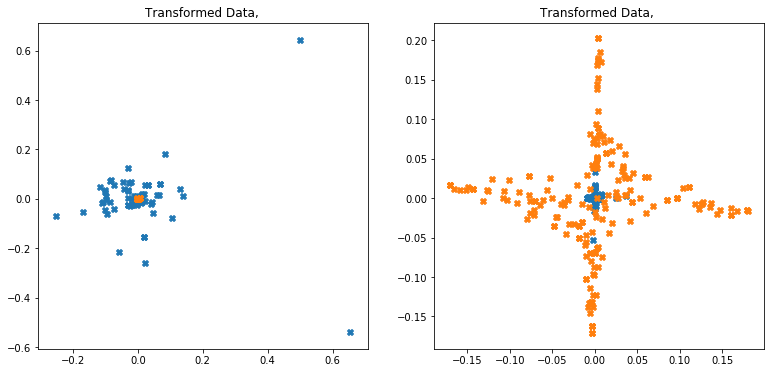

In [11]:
# Apply spectral clustering
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(13,6))
for normalize in [0, 1]:
    estLabels, Y = mySpectralClustering(W, K, normalize)
    scErrUn, UnestLabels_SP = hf.missRate(trueLabels, estLabels)
    print("Spectral Clustering error (normalized = %d): %.2f"%(normalize,scErrUn))

    # look at the data in the transformed space
    axes[normalize].scatter(Y[0, :N//2], Y[1, :N//2], marker='X')
    axes[normalize].scatter(Y[0, N//2:N], Y[1, N//2:N], marker='X')
    axes[normalize].set_title("Transformed Data, ");